<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Calculo/Actividad_07_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Jesús Armando Cañas Gamboa
*Métodos computacionales*

---

# 1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [2]:
e = np.e
f1 = lambda x: e **(3*x) * np.sin(x)
f2 = lambda x: 1/(x* np.log(x))

#Funcion que calcula el error

In [3]:

def error_en_funcion_de_H (f, a, b, H):
    
    ''' 
    Esta función calcula el error en 
    función de la separación h  para los metodos
    de integracion de Simpon y Trapezoid usando como 
    base el valor proporcionado por quad

    Entrada: 
    f: Funcion a integrar
    a: limite inferior
    b: limite superior
    H: array con los valores de H

    Salida
    array con los valores de error de cada metodo
    '''
    Res_quad, _ = quad(f, a, b)
    
    #Caclulo del error para cada metodo
    error_Simp = []
    error_Trap = []

    for h in H:
        x = np.arange(a, b + h , h)

        Res_simp = simpson(f(x),x) #Calculamos el resultado con simpson
        Res_Trap = trapezoid(f(x), x) #Calculasmo con trapezoid
        
        error_Simp.append(abs(Res_quad - Res_simp)) #Guardamos el error
        error_Trap.append(abs(Res_quad - Res_Trap))
        
    return error_Simp, error_Trap#Retornamos los arrays de error

In [4]:
H = np.logspace(-8, 0, 9) #Array con los valores de H
error_Simp, error_Trap = error_en_funcion_de_H(f1, 0, np.pi/4, H) #Calculo para la funcion 1
error_Simp1, error_Trap1 = error_en_funcion_de_H(f2, e, 1 + e, H) #Calculo para la funcion 2

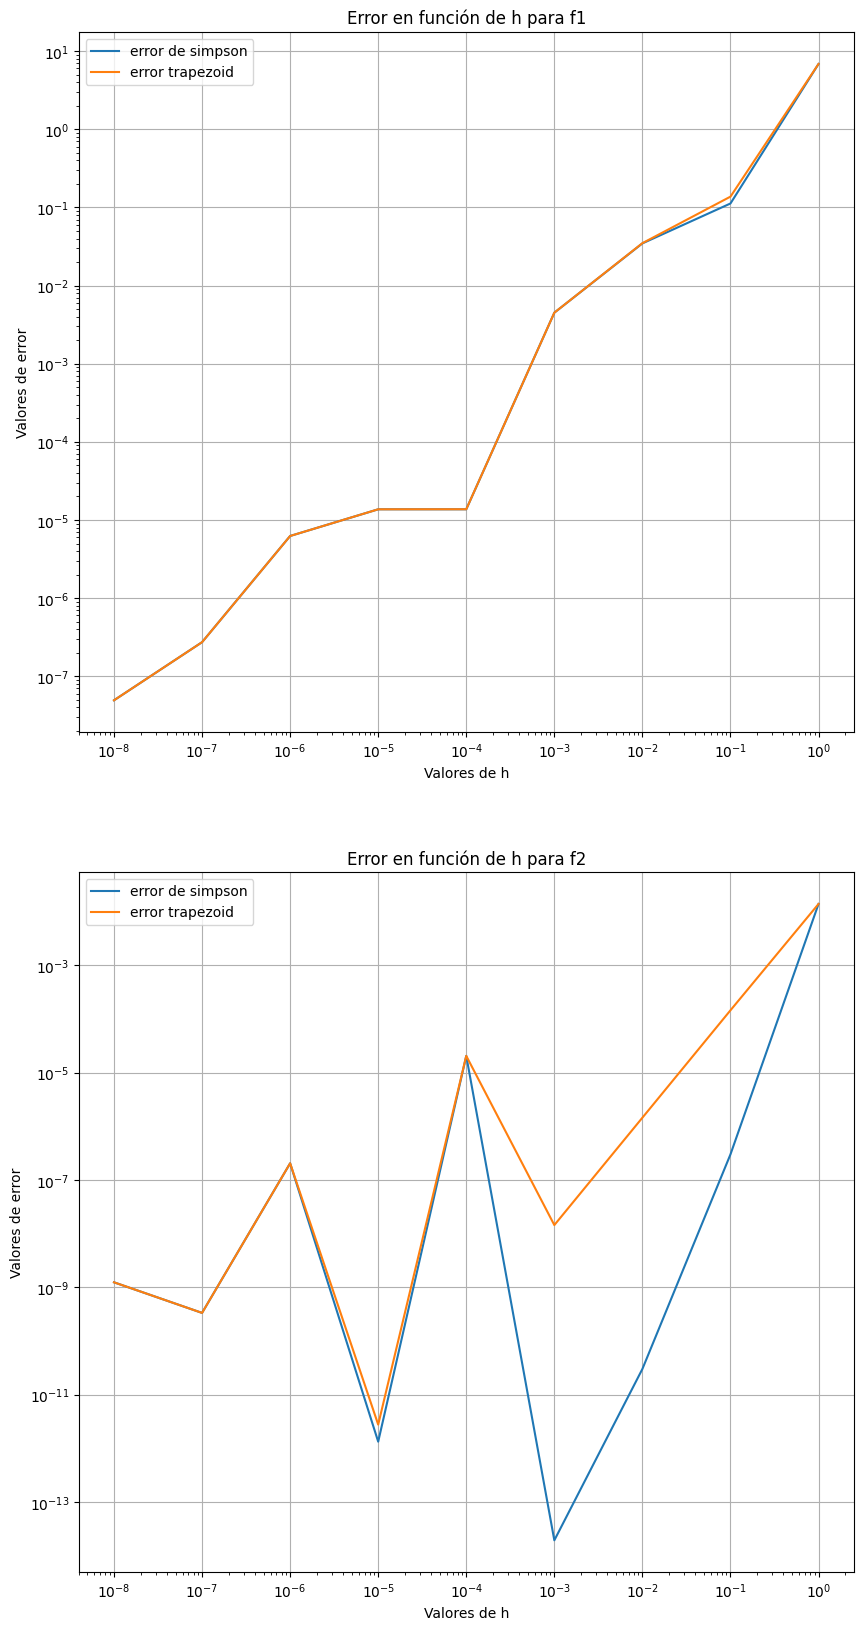

In [5]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.title('Error en función de h para f1')
plt.loglog(H, error_Simp, label = 'error de simpson')
plt.loglog(H, error_Trap, label = 'error trapezoid')
plt.xlabel('Valores de h')
plt.ylabel('Valores de error')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Error en función de h para f2')
plt.loglog(H, error_Simp1, label = 'error de simpson')
plt.loglog(H, error_Trap1, label = 'error trapezoid')
plt.xlabel('Valores de h')
plt.ylabel('Valores de error')
plt.grid()
plt.legend()

# 2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [12]:
#Caclulamos la integral usando integrales anidadas
def Integral_z(y ,x): #Integracion de z para f(z, y,x)
    integrando = lambda z: 1/y * np.sin(z/y) #Función a integrar
    resultado, _ = quad(integrando, 0, x*y) #Integral
    return resultado
    
def Integral_y(x): #Integracion de y para g(y, x)
    integrando = lambda y : Integral_z(y,x) #Funcion a integral
    resultado, _ = quad(integrando, 0, x) #Integral
    return resultado

resultado, _ = quad(Integral_y, 0, np.pi) #Integral de x para h(x)
print(resultado) #resultado

6.934802200544679


In [13]:
#Integral usando dblquad

#Limites de integración
f = lambda z, y,x: 1/y * np.sin(z/y)
a, b = 0, np.pi
g, h = 0, lambda x: x

q, r  = 0, lambda x, y : x * y

#Valor de la integral con error
tplquad(f, a, b, g, h, q,r)

(6.934802200544679, 7.699177074265904e-14)

# 3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [21]:
from scipy.special import roots_legendre
def Cuadratura_Gaussiana(a, b, f, n):
    '''
    Calcula la integral usando polinomio
    de Gauss Legendre entre[a,b]
    
    Entradas
    f funcion Callable
    n Grado del polinomio
    
    Salida
    Valor aproximado de la integral
    
    '''
    xi , wi= roots_legendre(n)
    
    p = (b-a)/2 #Nuevos parametros de sustitucion
    
    q = (b +a )/2

    valores = np.array([ f(p * x + q) for x in xi])
    integral= p * np.sum(wi * valores) #Valor de la integral
    
    return integral

In [23]:
resultado= Cuadratura_Gaussiana(0, np.pi, Integral_y, 5) #Integral de x para h(x)
print(resultado) #resultado

6.9348011089857


# 4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [2]:
def Trapezoid_error(f, a, b, v, e, N):
    '''
    Esta función calcula el valor de la integral
    usando el metodo trapezoidal grantizando un error de
    e-5

    Entradas
    f función que se va a integrar
    a limite inferior del intervalo
    b limite superior del intervalo
    v valor exacto de la integral
    N maximo de iteraciones
    e error

    Salida
    Valor de la integral con un error de e-5
    '''
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    
    n = 2 #Numero de subintervalos
    
    for i in range(N):
        
        x = np.linspace(a, b, n) #Hacemos el array de los xy garantizamos que el intervalo 
        
        integral = trapezoid(f(x), x) #Integral con trapezoid

        if abs(v - integral) < 1e-5: #Miramos si cumple con el error
            return integral #Si es asi retornamos la integral
        n *= 2
    raise RuntimeError('Maximo de iteraciones alcanzdo') #si no se llega a un valor de la integral

    

In [3]:
def Simpson_con_error(f, a, b, v, e, N):
    '''
    Esta función calcula el valor de la integral
    usando el metodo de Simpon grantizando un error de
    e-5

    Entradas
    f función que se va a integrar
    a limite inferior del intervalo
    b limite superior del intervalo
    h ancho de los intevalos
    v valor exacto de la integral
    N maximo de iteraciones
    e error

    Salida
    Valor de la integral con un error de e-5
    '''
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
        
    

    n = 2 #Valor incical de intevalos
    
    for t in range(N):
        x = np.linspace(a, b, n) #Hacemos un array con los x
        y = f(x)
        integral = simpson(y, x) #Integral con simpson
        
        if abs(v - integral) < e: #Miramos si cumple con el error
            return integral #Si es asi retornamos la integral
            
        n *= 2 #Damos un valor mas pequeño a n


    raise RuntimeError('Maximo de iteraciones alcanzdo') #si no se llega a un valor de la integral


In [4]:
def Cuadratura_Gaussiana_error(f, a, b, v ,e , N):
    '''
    Calcula la integral usando polinomio
    de Gauss Legendre entre[a,b]
    
    Entradas
    f funcion Callable
    a limite inferior del intervalo
    b limite superior del intervalo
    N maximo de iteraciones
    v valor mas presiso de la integral
    e error
    Salida
    Valor aproximado de la integral
    con un error e
    '''
    p = (b-a)/2 #Nuevos parametros de sustitucion
    
    q = (b +a )/2

    n = 1
    for i in range(N):
        
        xi , wi = roots_legendre(n)

        valores = np.array([ f(p * x + q) for x in xi])
        
        integral = p * np.sum(wi * valores) #Valor de la integral
        
        if abs(v - integral)<= e:
            return integral
        n *= 10
    raise RuntimeError('Maximo de iteraciones alcanzado sin convergencia')

### Integral 1

In [5]:
f = lambda x: 1/ np.sqrt(np.tan(x)) #Para f1
a = 0.0000002
b = np.pi/2 - 0.0000002
v, _ = quad(f, a, b)
e = 1e-5
N = 30
print(Trapezoid_error(f, a, b, v, e, N))
 

2.220551073408986


In [6]:
f = lambda x: 1/ np.sqrt(np.tan(x))
a = 0.0000002
b = np.pi/2 - 0.0000002
v, _ = quad(f, a, b)
e = 1e-5
N = 30
Simpson_con_error(f, a, b, v, e, N)

2.2205487494066567

In [7]:
f = lambda x: 1/ np.sqrt(np.tan(x))
a = 0.0000002
b = np.pi/2 - 0.0000002
v, _ = quad(f, a, b)
e = 1e-5
N = 5000
Cuadratura_Gaussiana_error(f, a, b, v, e, N)

2.220547040005684

### Funcion 2

In [8]:
f = lambda x :np.cos(x) / x**3
a = 1
b = 500
e = 1e-5
v, _ = quad(f, a, b)
N = 100
Trapezoid_error(f, a, b, v, e, N)

0.018120592403832892

In [9]:
f = lambda x :np.cos(x) / x**3

a = 1
b = 500
e = 1e-5
v, _ = quad(f, a, b)
N = 100
Simpson_con_error(f, a, b, v, e, N)

0.018121899613822386

In [8]:
f = lambda x :np.cos(x) / x**3

a = 1
b = 500
e = 1e-5
v, _ = quad(f, a, b)
N = 5000
Cuadratura_Gaussiana_error(f, a, b, v, e, N)

0.018109012155532192

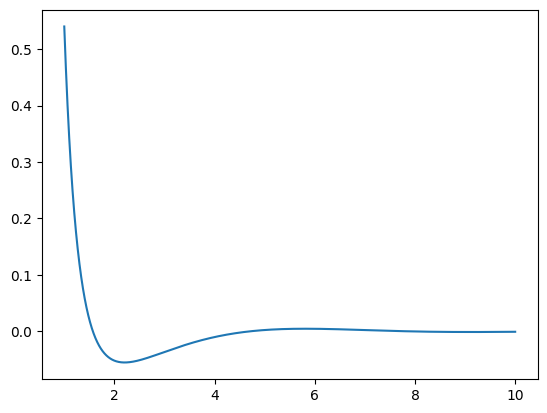

In [9]:
f = lambda x : np.cos(x) / x**3
x = np.linspace(1, 10, 1000000) #Grafica
y = f(x)
plt.plot(x, y)

### Integral 3

In [10]:
#Metodos modificados para hacer la integral doble

In [11]:
def Trapezoid_error_1(f, a, b, v, e, N):
    '''
    Esta función calcula el valor de la integral
    usando el metodo trapezoidal grantizando un error de
    e-5

    Entradas
    f función que se va a integrar
    a limite inferior del intervalo
    b limite superior del intervalo
    v valor exacto de la integral
    N maximo de iteraciones
    e error

    Salida
    Valor de la integral con un error de e-5
    '''
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    
    n = 2 #Numero de subintervalos
    
    for i in range(N):
        
        x = np.linspace(a, b, n) #Hacemos el array de los xy garantizamos que el intervalo 
        y = np.array([f(x_i) for x_i in x]) #Modificacion
        integral = trapezoid(y, x) #Integral con trapezoid

        if abs(v - integral) < 1e-5: #Miramos si cumple con el error
            return integral #Si es asi retornamos la integral
        n *= 2
    raise RuntimeError('Maximo de iteraciones alcanzdo') #si no se llega a un valor de la integral

    

In [12]:
def Simpson_con_error_1(f, a, b, v, e, N):
    '''
    Esta función calcula el valor de la integral
    usando el metodo de Simpon grantizando un error de
    e-5

    Entradas
    f función que se va a integrar
    a limite inferior del intervalo
    b limite superior del intervalo
    h ancho de los intevalos
    v valor exacto de la integral
    N maximo de iteraciones
    e error

    Salida
    Valor de la integral con un error de e-5
    '''
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
        
    

    n = 2 #Valor incical de intevalos
    
    for t in range(N):
        x = np.linspace(a, b, n) #Hacemos un array con los x
        y = np.array([f(x_i) for x_i in x]) #Modificacion
        integral = simpson(y, x) #Integral con simpson
        
        if abs(v - integral) < e: #Miramos si cumple con el error
            return integral #Si es asi retornamos la integral
            
        n *= 2 #Damos un valor mas pequeño a n


    raise RuntimeError('Maximo de iteraciones alcanzdo') #si no se llega a un valor de la integral


In [14]:
def integral_y(x):
    integrando = lambda y: ( 1 - y**2) ** -0.5
    res, _ = quad(integrando, 0, np.sin(x))
    return res
    
v, _ = quad(integral_y, 0, np.pi/4)
a = 0
b = np.pi/4
N = 1000
e = 1e-5

print(f' La integral usando Simpon con un error de 10-5 es {Simpson_con_error_1(integral_y, a, b, v, e, N)}')
print(f' La integral usando Trapezoid con un error de 10-5 es {Trapezoid_error_1(integral_y, a, b, v, e, N)}')
print(f' La integral usando Cuadratura Gaussiana con un error de 10-5 es {Cuadratura_Gaussiana_error(integral_y, a, b, v, e, N)}')

 La integral usando Simpon con un error de 10-5 es 0.3084251375340425
 La integral usando Trapezoid con un error de 10-5 es 0.3084251375340425
 La integral usando Cuadratura Gaussiana con un error de 10-5 es 0.3084251375340425


In [21]:
v #Resultado usando quad

0.30842513753404244

In [22]:
(np.pi)**2/32 #Valor exacto

0.30842513753404244